The term customer churn refers to customers stopping their consumption of a company's services and/or products. Churn Prediction is a process whereby a model is designed to predict whether a customer is likely to churn. </br>
As opposed to the previous chapter, where the result of the prediction could've been any number; churn prediction is a <b>binary classification</b> problem where the possible outcome could either be the condition where the customer churns and the outcome where the customer won't churn.  </br>
 </br>
Once the likelihood of churning is found out, the company can then send out promotional messages including discounts and offers to the customer in order to encourge them to keep using the company's services

<b>Dataset :</b> https://www.kaggle.com/blastchar/telco-customer-churn

In [126]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Customer_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataframe has wayy to many columns to fit on the screen at the same time. So we transpose the dataframe to see all the columns at once

In [3]:
pd.read_csv('Customer_data.csv').head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
#Editing the column names
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [6]:
# making the values of columns having dtypes as object to be uniform.
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [7]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Here, we can see that the column totalcharges has the dtype object even though it contains numbers. In this case pandas can be used to convert the object type into numeric type.

In [9]:
# the keyword 'coerce' is used to skip any value that cannot be converted to a numeric value
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Some of the rows in the total charges columns are null. Filling in the null value with zero

In [11]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.totalcharges.isnull().sum()

0


#### Analysing the target variable.

In [14]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

The churn variable has categorical values. However, for binary classification the model requires numerical values. We can use the astype function to convert the object type to boolean value

In [15]:
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

#
## Validation Framework

Using scikit learn to split the dataset into train, validation and testing groups.

In [17]:
!pip install scikit-learn

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state = 1)

train_test_split function takes in three paramenters: </br>
1. First parameter is the dataset that is to be split.
2. Second parameter is the size of the dataset that is to be set aside i.e the test set
3. Third parmeter is the random_state value which ensures the dataset is shuffled in the exact way every time the code is run.</br>
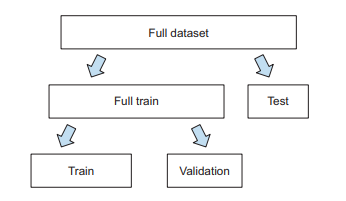

In [20]:
#Splitting the full train into train and validation datasets.

df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [24]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [25]:
df_train_full = df_train_full.reset_index(drop = True)

#
## Exploratory Data Analysis

In [26]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
# Checking the distribution of the target variable
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [28]:
df_train_full.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

We can see that 27% of the customers chose to stop using the company's services. This is also called the churn rate. Another way of calculating the churn rate is calculating the mean.

In [29]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

The dataset is an <b>imbalanced datset</b> because the number of users who chose not to churn is three times the number of users who chose to churn. </br></br>
A <b> balanced dataset </b> on the other hand is the dataset where both of the classes are equally distributed.

In [30]:
# Listing the categorical and numerical variables
numerical = ['tenure', 'monthlycharges','totalcharges']
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [31]:
type(numerical)

list

In [32]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#
## Feature Importance : Churn Rate and Risk Ratio

<b>Feature Importance Analysis</b> is the process of finding out which of the variables have a greater effect on the target variable.

In [33]:
df_train_full

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


### Churn rate

In [34]:
# Calculating the global churn rate
global_mean = df_train_full.churn.mean()
round(global_mean, 2)

0.27

Finding out the churn rate for the different gender groups

In [35]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

In [36]:
male_mean = df_train_full[df_train_full.gender =='male'].churn.mean()

In [37]:
female_mean, male_mean

(0.27682403433476394, 0.2632135306553911)

Here, it can be seen that the global mean and the mean for the male and the female groups are not very different. This means, gender is a not a useful variable when predicting churn.

Finding out the churn rate for the partner groups

In [38]:
df_train_full.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [39]:
partner_yes = df_train_full[df_train_full.partner=='yes'].churn.mean()

In [40]:
partner_no = df_train_full[df_train_full.partner=='no'].churn.mean()

In [41]:
print('Partner == yes: ', round((partner_yes- global_mean),3))
print('Partner == no: ', round((partner_no - global_mean),3))

Partner == yes:  -0.065
Partner == no:  0.06


The churn rate for customers with no partners is significantly greater than the customers with partners. This indicates that the variable partner is useful for predicting churn. 

### Risk Ratio

Risk Ratio is the ratio between the probablities in different groups, where risk refers to the risk of having the effect i.e churn. 
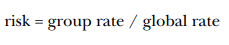

In [42]:
risk = female_mean / global_mean

In [43]:
risk

1.0253955354648652

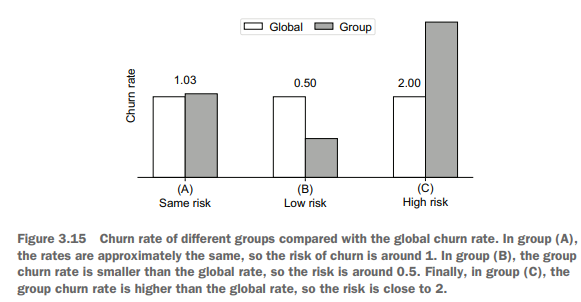

In [44]:
male_risk = male_mean / global_mean
female_risk = female_mean/global_mean

partner_yes_risk = partner_yes/global_mean
partner_no_risk = partner_no / global_mean

In [45]:
print('male: ', round(male_risk,2))
print('female: ', round(female_risk,2))

print('yes: ', round(partner_yes_risk,2))
print('no: ', round(partner_no_risk,2))

male:  0.97
female:  1.03
yes:  0.76
no:  1.22


In [46]:
from IPython.display import display

In [47]:
for c in categorical:
    print(c)
    df_group = df_train_full.groupby(by=c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


#
## Feature Importance: Mutual Information

From the above data, we get to know about the importance of categories within a variable. However, we cannot say which of the variable is the most important in predicting the target value. Mutual Information is a metric which calculates the dependency of a feature variable with the target variable. Higher dependency between the variables shows greater effect of feature variable in predicting the value of the target variable whereas variable having lower dependency aren't considered to be important. 

In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
def calculate_mutual_info(series):
    return mutual_info_score(series, df_train_full.churn)

In [50]:
df_mutual_info = df_train_full[categorical].apply(calculate_mutual_info)
df_mutual_info = df_mutual_info.sort_values(ascending=False).to_frame(name = 'Mutual Information')

In [51]:
df_mutual_info

,Mutual Information
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


#
## Feature Importance : Correlation

Mutual Information can't be used as a metric to find the degree of dependence if the variables involved are numerical. To find the dependency between a binary target variable and numerical variable a method called Correlation Coefficient is used. It's value ranges from -1 to 1. 

1. Positive Correlation: when one variable goes up the other variable goes up too.
2. Zero Correlation: this shows that there is no relation between the variables.
3. Negative Correlation: when one variable goes up, the other variable goes down. 

In [52]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [53]:
print(df_train_full[df_train_full.tenure <=2].churn.mean())

print(df_train_full[(df_train_full.tenure > 2) & (df_train_full.tenure <=12)].churn.mean()
)
print(df_train_full[df_train_full.tenure >12].churn.mean())

0.5953420669577875
0.3994413407821229
0.17634908339788277


As the tenure goes up, the churn rate goes down since the correlation between these two variables is negative. This shows customers who have been with the company the longest are less likely to churn than customers with shorter tenure period.

In [54]:
print(df_train_full.monthlycharges.min())
print(df_train_full.monthlycharges.max())

18.25
118.65


In [55]:
print(df_train_full[df_train_full.monthlycharges <=20].churn.mean())

print(df_train_full[(df_train_full.monthlycharges > 20) & (df_train_full.tenure <=70)].churn.mean()
)
print(df_train_full[df_train_full.monthlycharges >70].churn.mean())

0.08795411089866156
0.31179596174282675
0.3594566353187043


As the monthlycharges goes up, the churn rate goes up too since the correlation between these two variables is positive. This shows customers who have higher monthly charges are more likely to churn than customers with lower monthly charges.
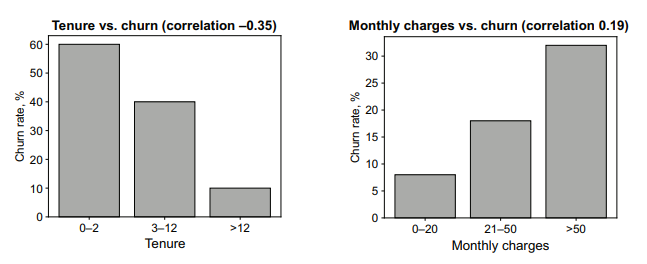

#
## Feature Engineering

Machine learning models require numerical features in matrices to predict future values. So we need to convert the categorical values to numeric values. The process of this conversion is called encoding. One method of encoding is the one-hot encoding. </br>
Example: If a variable has possible values (monthly, yearly, and two year), we can represent a customer with having a monthly contract as (1,0,0). Here, only the monthly variable is active(hot) so it is represented by 1 and rest of the values are represented by 0.

#### One hot encoding

In [56]:
from sklearn.feature_extraction import DictVectorizer 

DictVectorizer take a dictionary and outputs vectors
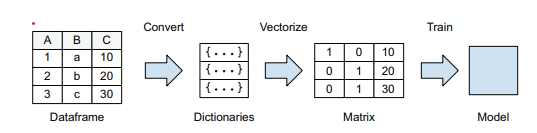

In [57]:
#Converting the df_train dataset to a dictionary
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [58]:
# Each column in the dataset is a key and rows are taken as values
train_dicts

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [59]:
# Creating an instance of DictVectorizer
# sparse = false indicates the resulting matrix won't be converted to a compressed sparse
# matrix, rather it will be stored as a normal numpy array
dv = DictVectorizer(sparse = False)

In [60]:
# Training the instance using the fit method.
# fit method calculates how the dictonary should be mapped. 
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [61]:
list(dv.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [62]:
# Converting the dictionary to a matrix
X_train = dv.transform(train_dicts)

In [63]:
X_train[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

In [64]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [65]:
X_val = dv.transform(val_dicts)

#
## Logistic Regression

We will use logic regression as a classification model to predict whether the customer will churn or not. Logistic regression is the same as linear regression with sigmoid function applied on it. 
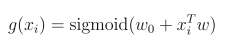</br>
</br>
Since the output to be predicted is the probablity of a customer churning, we apply the sigmoid function to restrict the output between 0 and 1 where the sigmoid function is expressed as
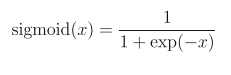

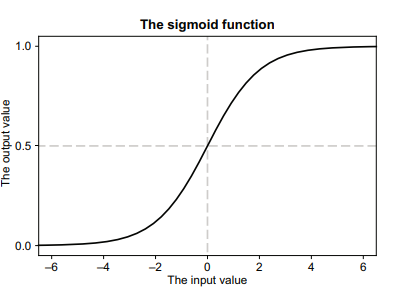
No matter what value is given to the sigmoid function, it converts the input to a value between zero and one.

In [66]:
import math

In [67]:
def sigmoid(score):
    return 1 / (1 + math.exp(-score))

In [68]:
def linear_regression(xi):
    score = bias
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    result = sigmoid(score)
    return result

### Training the logistic regression model

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [71]:
# soft predictions
y_pred = model.predict_proba(X_val)[:,1]

In [72]:
# hard predictions 
churn = y_pred >= 0.5

In [73]:
df_val[churn].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: object

In [74]:
(y_val == churn).mean()

0.8055358410220014

0.80 indicates that our model predicted 80% of the data correctly.

In [75]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn.astype(int)
df_pred['actual']  = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.007359,0,0,True
1,0.209721,0,0,True
2,0.220708,0,0,True
3,0.575035,1,1,True
4,0.216672,0,0,True
...,...,...,...,...
1404,0.295301,0,0,True
1405,0.040020,0,1,False
1406,0.148879,0,0,True
1407,0.784839,1,1,True


In [76]:
df_pred['correct'].value_counts(normalize = True)

correct
True     0.805536
False    0.194464
Name: proportion, dtype: float64

In [77]:
model.intercept_[0]

-0.12193427062751563

In [78]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.607,
 'contract=one_year': -0.058,
 'contract=two_year': -0.671,
 'dependents=no': -0.028,
 'dependents=yes': -0.094,
 'deviceprotection=no': 0.052,
 'deviceprotection=no_internet_service': -0.103,
 'deviceprotection=yes': -0.071,
 'gender=female': -0.042,
 'gender=male': -0.08,
 'internetservice=dsl': -0.376,
 'internetservice=fiber_optic': 0.357,
 'internetservice=no': -0.103,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.248,
 'multiplelines=no_phone_service': 0.133,
 'multiplelines=yes': -0.008,
 'onlinebackup=no': 0.057,
 'onlinebackup=no_internet_service': -0.103,
 'onlinebackup=yes': -0.076,
 'onlinesecurity=no': 0.217,
 'onlinesecurity=no_internet_service': -0.103,
 'onlinesecurity=yes': -0.236,
 'paperlessbilling=no': -0.249,
 'paperlessbilling=yes': 0.127,
 'partner=no': -0.116,
 'partner=yes': -0.006,
 'paymentmethod=bank_transfer_(automatic)': -0.101,
 'paymentmethod=credit_card_(automatic)': -0.049,
 'paymentmethod=electronic_check': 0.067

#
## Model Interpretation 

Taking fewer variables to train the model in order to better understanding of the model.

In [79]:
#defining the variables to be considered
small_subset = ['contract', 'tenure', 'totalcharges']

In [80]:
# converting the subset of the data to a dictionary form
train_dict_small = df_train[small_subset].to_dict(orient='records')

In [81]:
dv_small = DictVectorizer(sparse = False) # creating an instance of the DictVectorizer
dv_small.fit(train_dict_small) # training the instance with the previously generated dictionary.

DictVectorizer(sparse=False)

In [82]:
# encoding the categorical variables
X_small_train = dv_small.transform(train_dict_small)

In [83]:
# Listing the features that the new model will use
list(dv_small.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'tenure',
 'totalcharges']

In [84]:
model_small = LogisticRegression(solver = 'liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [85]:
model_small.intercept_[0] #bias

-0.05356585030251741

Here, the value of the bias term is -0.05. For negative values, the output of the sigmoid function becomes less than 0.5. This means that on average the customer is less likely to churn. 
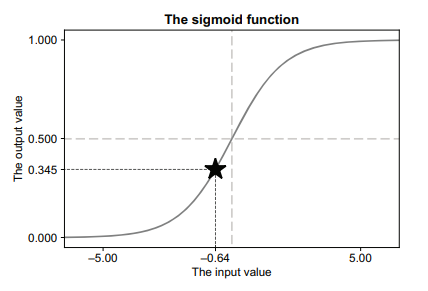

In [86]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3))) #weights

{'contract=month-to-month': 0.495,
 'contract=one_year': -0.197,
 'contract=two_year': -0.351,
 'tenure': -0.116,
 'totalcharges': 0.001}

#
## Using the Model

In [87]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}

In [88]:
# converting the dictionary to a matrix by using the DictVectorizer
X_test = dv.transform([customer])

In [89]:
model.predict_proba(X_test)

array([[0.94449203, 0.05550797]])

0.94 -> probability of the customer staying with the company</br>
0.05 -> probability of the customer churning

In [90]:
model.predict_proba(X_test)[0,1]

0.05550797053968442

The prediction of the model is 0.05, so the probability that the customer will churn is only 5% which is significantly less than 50% and hence it won't be necessary to send promotional messages to this customer.

In [91]:
customer = {
 'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 85.7,
 'totalcharges': 85.7
}

In [92]:
X_test = dv.transform([customer])

In [93]:
model.predict_proba(X_test)[0,1]

0.8011511776352128

The probablility that this customer will churn is 80%, so it would be wise to send promotional messages to this customer.

# Chapter 4: Evaluation Metrics for Classification

### 4.1 Evaluation Metrics
A metric is a function that compares the prediction of the model with the actual values. Then on that basis, it calculates how good the model performed. We can evaluate the metrics for different types of model and finally choose the one with the best metric value.</br>
In the previous linear regression model, we used RMSE as a metric. However, it cannot be used as a metric for classification model. 

#### Evaluation metrics for binary classification:

#### 4.1.1 Classification Accuracy
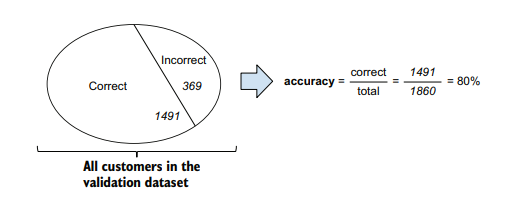

the accuracy of a binary classification is the ratio of correct predictions made and the total predictions
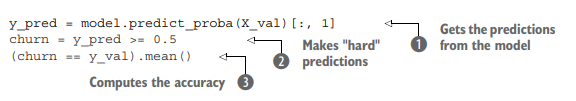
Here, we chose 0.5 as the threshold for accuracy but a range of thresholds can be used too.

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
thresholds = np.linspace(0,1,11) #divides 0 and 1 into 11 parts

for t in thresholds:
    churn = y_pred >=t
    accuracy = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' %(t, accuracy))

0.00 0.274
0.10 0.605
0.20 0.705
0.30 0.759
0.40 0.781
0.50 0.806
0.60 0.800
0.70 0.766
0.80 0.729
0.90 0.726
1.00 0.726


We can see that the threshold 0.5 has the highest accuracy. Now visualizing these numbers using matplotlib

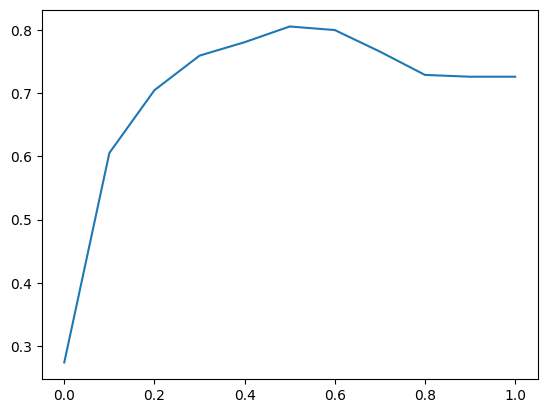

In [96]:
thresholds = np.linspace(0,1, 11)
accuracies = []

for t in thresholds:
    accuracy = accuracy_score(y_val, y_pred >=t)
    accuracies.append(accuracy)
    
plt.plot(thresholds, accuracies)

From the figure it can be seen that 0.5 gives the highest accuracy which is 80%.</br>
But we don't know whether a 80% accuracy is a good score.

In [97]:
val_dict_small = df_val[small_subset].to_dict(orient = 'records')

X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[:,1]

churn_small = y_pred_small >=0.5
round(accuracy_score(y_val, churn_small),3)

0.761

#### 4.1.2 Dummy Baseline

In order to know whether 80% is a good score, we need to compare it with something else like a dummy model that always predicts the same value.</br>
Earlier, we saw that the dataset is imbalanced i.e the number of churned users is significantly less than the number of non churned users. Here the dummy model can be used to predict the majority class which is 'no churn'. 

In [98]:
# Creating a baseline model
size_val = len(y_val)  #number of customers in the validation set
baseline = np.repeat(False, size_val) #creating an array with only False elements

# Calculating the accuracy of the baseline model 
round(accuracy_score(baseline, y_val),3)

0.726

The above accuracy score signifies that our model is only slightly better than a dummy model that treats all the customers as not churned. </br>
This does not give us a clear conclusion as to whether our model is good. So we need other metrics to determine the quality of our model.

### 4.2 Confusion Table
When the dataset on which the model is based on is imbalanced, accuracy might not be the best metric to determine the model's quality. One other way to measure the quality is called a confusion table, a table that represents every possible outcome for the model's prediction </br>
For a binary classification there can only be two possible outcomes:
1. Churn
2. Not Churn


Each of these predictions can be compared with the ground truth which is turn yields two other results: </br>
1. The model predicted 'not churn' and the customer did not churn.
2. The model predicted 'not churn' and the customer churned.
3. The model predicted 'churn' and the customer did not churn.
4. The model predicted 'churn' and the customer churned.

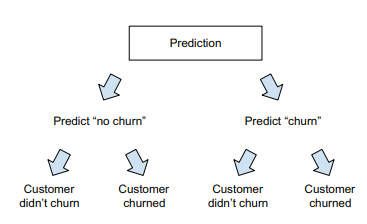

Each of the four possible outcomes has its own name.
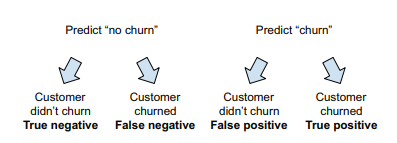

We can represent the above information in a table.
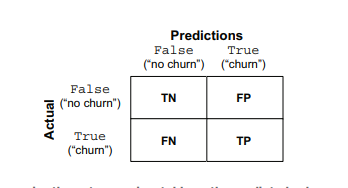

#### 4.2.2 Confusion table with NumPy

In [99]:
# Calculating the values of the confusion table
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum() 
false_positive = (predict_churn & actual_no_churn).sum() 

false_negative = (predict_no_churn & actual_churn).sum() 
true_negative = (predict_no_churn & actual_no_churn).sum()

In [100]:
confusion_table = np.array([[true_negative, false_positive],
                           [false_negative, true_positive]])
confusion_table

array([[923, 100],
       [174, 212]])

In [103]:
confusion_table / confusion_table.sum()

array([[0.65507452, 0.07097232],
       [0.12349184, 0.15046132]])

The confusion table values can be used as a basis for other evaluation metrices. 

In [104]:
accuracy = (true_positive + true_negative) / (true_negative+ true_positive + false_negative + false_positive)

In [105]:
accuracy

0.8055358410220014

#### 4.2.3 Precision and recall

In the case of a class imbalance, the results of the accuracy score are skewed, so in such cases we can use metrics like precision and recall whoose values are calulated from the result of the confusion table. 

<b>Precision</b></br>
It tells the number of positive predictions that turned out to be correct. </br>
P = TP / ( TP + FP)

In [106]:
#Calculating the precision of the model

P = true_positive / (true_positive + false_positive)
P

0.6794871794871795

<b>Recall</b></br>
It is the fraction of correctly predicted positive values and all positive values.</br>
R = TP / ( TP + FN )

In [107]:
# Calculating the recall of our model
R = true_positive / (true_positive + false_negative)
R

0.5492227979274611

Notice that both of these metrics do not take into account the true negatives. This happens because, in an imbalanced dataset, the true negatives usually outnumber everything else. </br>

When carrying out the churn prediction project, our main aim is to identify customers who are likely to churn. Then, we can send them promotional messages to persuade them to stay. In this process, two type of erros can be made:</br>
1. We send messages to customers who weren't going to churn (false positives)
2. We fail to message customers who were actually going to churn (false negatives)
Precision and Recall helps us to identify these errors.  

In our model, the precision value is 68% which means that of all the customers we sent the message to, 68% of them were actually going to churn, whereas the remaining 32% were not.</br>
Similarly, recalls helps us to know how many churning customers we failed to send the message to. For our model, the recall value is 54% which means that we only identified 54% of the customers who churned. 46% of the churned customers remained unindentified. 

**** The value of precision should be high as possible and the value of recall should be as low as possible ****

The drawback of using precision and recall as evaluation metrics is that they describe the model's performance only at certain thresholds. It is useful to have a metric that can provide a overview of the model's performance at all possible threshold choices.

### 4.3 ROC Curve and AUC Score

ROC stands for <b> receiver operating characteristic</b>. It shows how well a model can separate two classes. To calculate ROC, we need two metrics: TPR and FPR

#### True positive rate and false positive rate
1. FPR : the fraction of false positives among all negative examples. It is the fraction of customers we predicted as churning among everbody who did not churn. It's value should be as low as possible.
2. TPR : the fraction of true positives among all positive examples. It is the fraction of customers we predicted as churning among everyone who churned. It's value should be as high as possible.

In [109]:
# Calculating FPR and TPR

FPR = false_positive / (false_positive + true_negative)
TPR = true_positive / (true_positive + false_negative)

print('FPR: ',round(FPR,3))
print('TPR: ',round(TPR,3))

FPR:  0.098
TPR:  0.549


#### 4.3.2 Evaluating a model at multiple thresholds

In [118]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    tp = ((y_pred >=t) & (y_val == 1)).sum()
    fp = ((y_pred >=t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

In [119]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold','tp','fp','fn','tn']

In [120]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,367,537,19,486
20,0.2,337,367,49,656
30,0.3,292,245,94,778
40,0.4,252,175,134,848
50,0.5,212,100,174,923
60,0.6,155,51,231,972
70,0.7,69,13,317,1010
80,0.8,4,0,382,1023
90,0.9,0,0,386,1023


In [121]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [122]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,367,537,19,486,0.950777,0.524927
20,0.2,337,367,49,656,0.873057,0.358749
30,0.3,292,245,94,778,0.756477,0.239492
40,0.4,252,175,134,848,0.652850,0.171065
50,0.5,212,100,174,923,0.549223,0.097752
60,0.6,155,51,231,972,0.401554,0.049853
70,0.7,69,13,317,1010,0.178756,0.012708
80,0.8,4,0,382,1023,0.010363,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


Text(0.5, 1.0, 'TPR and FPR')

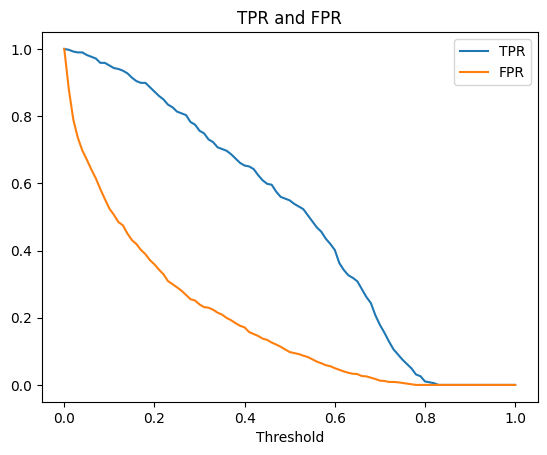

In [135]:
# Plotting the above values

plt.plot(df_scores.threshold, df_scores.tpr, label = 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label= 'FPR')
plt.xlabel('Threshold')
plt.legend()
plt.title('TPR and FPR')